# BA870/AC820 Assignment #2 - Template for Time-Series Predictions of Stock Trading Volume
### Make sure you read the instructions for Assignment #2 posted on Blackboard



## Import libraries and packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

## Upload *dataset* (CSV file is located in Assignments folder on Blackboard)

In [ ]:
all_data = pd.read_csv('assign2data.csv')

## Examine variables in dataframe

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ObsNum          753 non-null    int64  
 1   TrainTest       753 non-null    object 
 2   DayOfWeek       753 non-null    object 
 3   Month           753 non-null    int64  
 4   VolStock1(t)    503 non-null    float64
 5   EADay           753 non-null    int64  
 6   EADayBefore     753 non-null    int64  
 7   EADayAfter      753 non-null    int64  
 8   VolStock1(t-1)  504 non-null    float64
 9   VolStock2(t-1)  753 non-null    float64
 10  VolStock3(t-1)  753 non-null    float64
 11  VolStock4(t-1)  753 non-null    float64
 12  VolStock5(t-1)  753 non-null    float64
 13  VolStock6(t-1)  753 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 82.5+ KB


## View dataframe for complete dataset (all_data)

In [ ]:
all_data

,ObsNum,TrainTest,DayOfWeek,Month,VolStock1(t),EADay,EADayBefore,EADayAfter,VolStock1(t-1),VolStock2(t-1),VolStock3(t-1),VolStock4(t-1),VolStock5(t-1),VolStock6(t-1)
0,1,Train,Monday,3,2.65,0,0,0,2.55,4.01,3.89,2.77,6.30,5.01
1,2,Train,Tuesday,3,3.99,0,0,0,2.65,2.18,2.74,1.81,4.29,3.02
2,3,Train,Wednesday,3,3.08,0,0,0,3.99,5.00,4.68,4.47,6.82,4.99
3,4,Train,Thursday,3,2.55,0,0,0,3.08,4.51,3.22,2.89,4.82,3.99
4,5,Train,Friday,3,2.56,0,0,0,2.55,3.80,2.60,3.40,4.62,4.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,Test,Friday,14,NaN,0,0,0,NaN,3.35,2.34,2.14,1.62,1.11
749,750,Test,Tuesday,14,NaN,0,0,0,NaN,2.12,1.76,1.80,1.26,0.95
750,751,Test,Wednesday,14,NaN,0,0,0,NaN,2.47,2.22,2.40,2.09,1.19
751,752,Test,Thursday,14,NaN,0,0,0,NaN,2.04,1.49,2.15,1.48,1.02


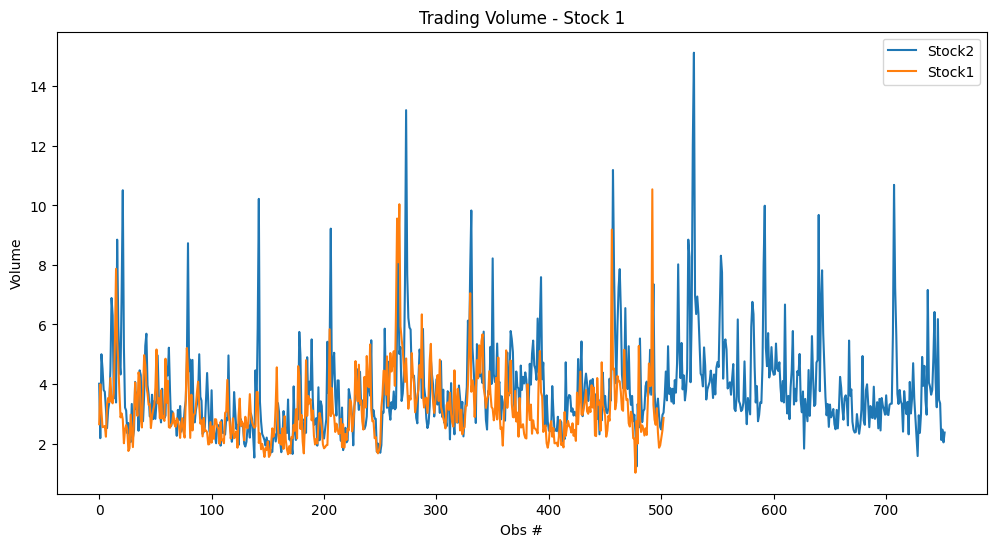

In [ ]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(all_data['VolStock2(t-1)'], label='Stock2')
plt.plot(all_data['VolStock1(t)'], label='Stock1')
plt.xlabel('Obs #')
plt.ylabel('Volume')
plt.legend()
plt.title('Trading Volume - Stock 1')
plt.show()

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ObsNum          753 non-null    int64  
 1   TrainTest       753 non-null    object 
 2   DayOfWeek       753 non-null    object 
 3   Month           753 non-null    int64  
 4   VolStock1(t)    503 non-null    float64
 5   EADay           753 non-null    int64  
 6   EADayBefore     753 non-null    int64  
 7   EADayAfter      753 non-null    int64  
 8   VolStock1(t-1)  504 non-null    float64
 9   VolStock2(t-1)  753 non-null    float64
 10  VolStock3(t-1)  753 non-null    float64
 11  VolStock4(t-1)  753 non-null    float64
 12  VolStock5(t-1)  753 non-null    float64
 13  VolStock6(t-1)  753 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 82.5+ KB


In [ ]:
train_data = all_data[:252] # dataset to train
validate_data = all_data[252:503] # dataset for validation
test_data = all_data[503:753]

##Train Data

In [ ]:
train_data = pd.get_dummies(train_data, columns=['DayOfWeek'])

# Print the updated DataFrame
print(train_data.head())

   ObsNum TrainTest  Month  VolStock1(t)  EADay  EADayBefore  EADayAfter  \
0       1     Train      3          2.65      0            0           0   
1       2     Train      3          3.99      0            0           0   
2       3     Train      3          3.08      0            0           0   
3       4     Train      3          2.55      0            0           0   
4       5     Train      3          2.56      0            0           0   

   VolStock1(t-1)  VolStock2(t-1)  VolStock3(t-1)  VolStock4(t-1)  \
0            2.55            4.01            3.89            2.77   
1            2.65            2.18            2.74            1.81   
2            3.99            5.00            4.68            4.47   
3            3.08            4.51            3.22            2.89   
4            2.55            3.80            2.60            3.40   

   VolStock5(t-1)  VolStock6(t-1)  DayOfWeek_Friday  DayOfWeek_Monday  \
0            6.30            5.01                 0    

In [ ]:
train_data = pd.get_dummies(train_data, columns=['Month'])

# Print the updated DataFrame
print(train_data.head())

   ObsNum TrainTest  VolStock1(t)  EADay  EADayBefore  EADayAfter  \
0       1     Train          2.65      0            0           0   
1       2     Train          3.99      0            0           0   
2       3     Train          3.08      0            0           0   
3       4     Train          2.55      0            0           0   
4       5     Train          2.56      0            0           0   

   VolStock1(t-1)  VolStock2(t-1)  VolStock3(t-1)  VolStock4(t-1)  ...  \
0            2.55            4.01            3.89            2.77  ...   
1            2.65            2.18            2.74            1.81  ...   
2            3.99            5.00            4.68            4.47  ...   
3            3.08            4.51            3.22            2.89  ...   
4            2.55            3.80            2.60            3.40  ...   

   Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  \
0        0        0        0        0        0         0    

In [ ]:
import pandas as pd

#Simple Moving Averages (SMA)
for i in range(2, 7):  # Loop through columns VolStock2(t-1) to VolStock6(t-1)
    train_data[f'SMA_{i}'] = train_data[f'VolStock{i}(t-1)'].rolling(window=4).mean()

#Exponential Moving Averages (EMA)
for i in range(2, 7):
    train_data[f'EMA_{i}'] = train_data[f'VolStock{i}(t-1)'].ewm(span=4, adjust=False).mean()

## Validate Data

In [ ]:
validate_data = pd.get_dummies(validate_data, columns=['DayOfWeek'])

# Print the updated DataFrame
print(validate_data.head())

     ObsNum       TrainTest  Month  VolStock1(t)  EADay  EADayBefore  \
252     253  Train/Validate      3          3.63      0            0   
253     254  Train/Validate      3          4.45      0            0   
254     255  Train/Validate      3          4.43      0            0   
255     256  Train/Validate      3          3.64      0            0   
256     257  Train/Validate      3          4.93      0            0   

     EADayAfter  VolStock1(t-1)  VolStock2(t-1)  VolStock3(t-1)  \
252           0            3.21            3.07            2.68   
253           0            3.63            3.04            3.82   
254           0            4.45            5.86            3.61   
255           0            4.43            4.00            4.97   
256           0            3.64            3.20            2.93   

     VolStock4(t-1)  VolStock5(t-1)  VolStock6(t-1)  DayOfWeek_Friday  \
252            2.67            4.61            3.61                 0   
253            2.9

In [ ]:
validate_data = pd.get_dummies(validate_data, columns=['Month'])

# Print the updated DataFrame
print(validate_data.head())

     ObsNum       TrainTest  VolStock1(t)  EADay  EADayBefore  EADayAfter  \
252     253  Train/Validate          3.63      0            0           0   
253     254  Train/Validate          4.45      0            0           0   
254     255  Train/Validate          4.43      0            0           0   
255     256  Train/Validate          3.64      0            0           0   
256     257  Train/Validate          4.93      0            0           0   

     VolStock1(t-1)  VolStock2(t-1)  VolStock3(t-1)  VolStock4(t-1)  ...  \
252            3.21            3.07            2.68            2.67  ...   
253            3.63            3.04            3.82            2.93  ...   
254            4.45            5.86            3.61            3.77  ...   
255            4.43            4.00            4.97            5.12  ...   
256            3.64            3.20            2.93            2.70  ...   

     Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  \
252     

In [ ]:
import pandas as pd

#Simple Moving Averages (SMA)
for i in range(2, 7):  # Loop through columns VolStock2(t-1) to VolStock6(t-1)
    validate_data[f'SMA_{i}'] = validate_data[f'VolStock{i}(t-1)'].rolling(window=4).mean()

#Exponential Moving Averages (EMA)
for i in range(2, 7):
    validate_data[f'EMA_{i}'] = validate_data[f'VolStock{i}(t-1)'].ewm(span=4, adjust=False).mean()

## Test Data

In [ ]:
test_data = pd.get_dummies(test_data, columns=['DayOfWeek'])

# Print the updated DataFrame
print(test_data.head())

     ObsNum TrainTest  Month  VolStock1(t)  EADay  EADayBefore  EADayAfter  \
503     504      Test      3           NaN      0            0           0   
504     505      Test      3           NaN      0            0           0   
505     506      Test      3           NaN      0            0           0   
506     507      Test      3           NaN      0            0           0   
507     508      Test      3           NaN      0            0           0   

     VolStock1(t-1)  VolStock2(t-1)  VolStock3(t-1)  VolStock4(t-1)  \
503            2.86            3.57            5.89            6.53   
504             NaN            4.42            8.15            5.98   
505             NaN            3.45            7.26            4.67   
506             NaN            5.27            7.80            5.07   
507             NaN            3.67            5.91            4.90   

     VolStock5(t-1)  VolStock6(t-1)  DayOfWeek_Friday  DayOfWeek_Monday  \
503            4.93          

In [ ]:
test_data = pd.get_dummies(test_data, columns=['Month'])

# Print the updated DataFrame
print(test_data.head())

     ObsNum TrainTest  VolStock1(t)  EADay  EADayBefore  EADayAfter  \
503     504      Test           NaN      0            0           0   
504     505      Test           NaN      0            0           0   
505     506      Test           NaN      0            0           0   
506     507      Test           NaN      0            0           0   
507     508      Test           NaN      0            0           0   

     VolStock1(t-1)  VolStock2(t-1)  VolStock3(t-1)  VolStock4(t-1)  ...  \
503            2.86            3.57            5.89            6.53  ...   
504             NaN            4.42            8.15            5.98  ...   
505             NaN            3.45            7.26            4.67  ...   
506             NaN            5.27            7.80            5.07  ...   
507             NaN            3.67            5.91            4.90  ...   

     Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  \
503        0        0        0        0     

In [ ]:
import pandas as pd

#Simple Moving Averages (SMA)
for i in range(2, 7):  # Loop through columns VolStock2(t-1) to VolStock6(t-1)
    test_data[f'SMA_{i}'] = test_data[f'VolStock{i}(t-1)'].rolling(window=4).mean()

#Exponential Moving Averages (EMA)
for i in range(2, 7):
    test_data[f'EMA_{i}'] = test_data[f'VolStock{i}(t-1)'].ewm(span=4, adjust=False).mean()

In [ ]:
train_data.dropna(inplace=True)
validate_data.dropna(inplace=True)

----------------------------

NOTE: The following textboxes and code are examples to help you get started on your Assignment. Your Colab Notebook should include your own code and analysis from this point forward.

-----------------------------

##Visualize the data

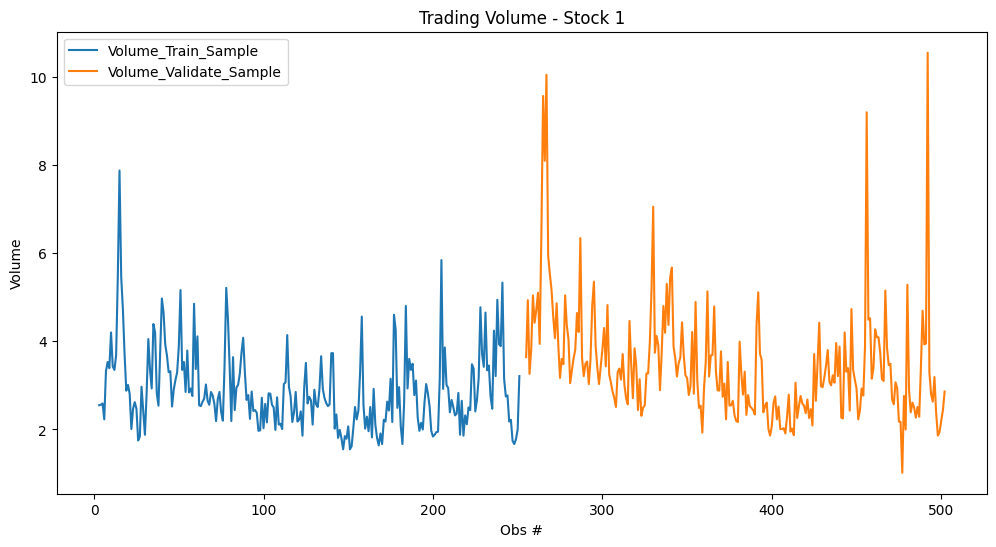

In [ ]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(train_data['VolStock1(t)'], label='Volume_Train_Sample')
plt.plot(validate_data['VolStock1(t)'], label='Volume_Validate_Sample')
plt.xlabel('Obs #')
plt.ylabel('Volume')
plt.legend()
plt.title('Trading Volume - Stock 1')
plt.show()

##Basic Model with two Variables, Earnings Announcement Day and Volume of Stock traded one day before

In [ ]:
X = train_data[['EADay','VolStock2(t-1)', 'VolStock3(t-1)', 'VolStock4(t-1)', 'VolStock5(t-1)', 'VolStock6(t-1)']]
y = train_data['VolStock1(t)']

X = sm.add_constant(X) # adding a constant

# Use statsmodels OLS regression

EADay_model = sm.OLS(y, X).fit()

# To get predicted values of Y, uncomment the following code:
vol_predict = EADay_model.predict(X)

In [ ]:
print_model = EADay_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VolStock1(t)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     26.92
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.66e-24
Time:                        03:45:56   Log-Likelihood:                -263.46
No. Observations:                 249   AIC:                             540.9
Df Residuals:                     242   BIC:                             565.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3717      0.175      7.

In [ ]:
Xnew = validate_data[['EADay','VolStock2(t-1)', 'VolStock3(t-1)', 'VolStock4(t-1)', 'VolStock5(t-1)', 'VolStock6(t-1)']]

Xnew = sm.add_constant(Xnew) # adding a constant

vol_pred = EADay_model.predict(Xnew)
vol_validate = validate_data['VolStock1(t)']

# MSE
mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.29


## Basic Model 2 - Variables used 'EADay', 'EADayBefore, 'EADayAfter', 'VolStock1(t-1)'

In [ ]:
X = train_data[['EADay','EADayBefore', 'EADayAfter']]
y = train_data['VolStock1(t)']

X = sm.add_constant(X) # adding a constant

# Use statsmodels OLS regression

EADay_model = sm.OLS(y, X).fit()

# To get predicted values of Y, uncomment the following code:
vol_predict = EADay_model.predict(X)

In [ ]:
print_model = EADay_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VolStock1(t)   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     19.96
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.32e-11
Time:                        03:45:56   Log-Likelihood:                -299.90
No. Observations:                 249   AIC:                             607.8
Df Residuals:                     245   BIC:                             621.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.8074      0.053     53.129      

In [ ]:
Xnew = validate_data[['EADay','EADayBefore', 'EADayAfter']]

Xnew = sm.add_constant(Xnew) # adding a constant

vol_pred = EADay_model.predict(Xnew)
vol_validate = validate_data['VolStock1(t)']

# MSE
mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.68


##OLS Model

In [ ]:
X = train_data[['EADay', 'EADayAfter', 'EADayBefore',
                'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday', 'DayOfWeek_Friday',
                'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12','Month_13', 'Month_14',
                'EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_6']]
y = train_data['VolStock1(t)']

X = sm.add_constant(X) # adding a constant

# Use statsmodels OLS regression

ols_model = sm.OLS(y, X).fit()

# To get predicted values of Y, uncomment the following code:
vol_predict = ols_model.predict(X)

In [ ]:
print_model = ols_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VolStock1(t)   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     9.626
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.14e-22
Time:                        03:45:56   Log-Likelihood:                -241.82
No. Observations:                 249   AIC:                             531.6
Df Residuals:                     225   BIC:                             616.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8925    

In [ ]:
Xnew = validate_data[['EADay', 'EADayAfter', 'EADayBefore',
                      'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday', 'DayOfWeek_Friday',
                      'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Month_13', 'Month_14',
                      'EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_6']]

Xnew = sm.add_constant(Xnew) # adding a constant

vol_pred = ols_model.predict(Xnew)
vol_validate = validate_data['VolStock1(t)']

# MSE
mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.18


If we take into consideration all the days of the week and all the months with the moving averages of the competetive stocks we get a mean squared error of 1.18. R-squared: The coefficient of determination (R-squared) measures the proportion of the variance in the dependent variable that is predictable from the independent variables. In this model, R-squared is 0.496, indicating that approximately 49.6% of the variability in 'VolStock1(t)' is explained by the independent variables.

##OLS Model 2

In [ ]:
X = train_data[['EADay', 'EADayAfter', 'EADayBefore',
                'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
                'Month_3',  'Month_6', 'Month_9', 'Month_12',
                'EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_6']]
y = train_data['VolStock1(t)']

X = sm.add_constant(X) # adding a constant

# Use statsmodels OLS regression

ols_model_2 = sm.OLS(y, X).fit()

# To get predicted values of Y, uncomment the following code:
vol_predict = ols_model_2.predict(X)

In [ ]:
print_model = ols_model_2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VolStock1(t)   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     14.47
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           7.95e-26
Time:                        03:45:57   Log-Likelihood:                -245.14
No. Observations:                 249   AIC:                             522.3
Df Residuals:                     233   BIC:                             578.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2327    

In [ ]:
Xnew = validate_data[['EADay', 'EADayAfter', 'EADayBefore',
                      'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
                      'Month_3', 'Month_6', 'Month_9', 'Month_12',
                      'EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_6']]

Xnew = sm.add_constant(Xnew) # adding a constant

vol_pred = ols_model_2.predict(Xnew)
vol_validate = validate_data['VolStock1(t)']

# MSE
mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.16


In this model, we incorporate factors related to Earnings Announcements and quarterly trends to better understand the volume of stock trading. Earnings Announcements typically occur on Tuesdays, influencing trading behaviors. As a result, we consider the trading volumes on Mondays, Tuesdays, and Wednesdays. Mondays often exhibit heightened trading activity due to market predictions ahead of announcements, while Wednesdays may see corrections or adjustments based on the announced earnings.

Additionally, we account for quarterly trends, as earnings are typically reported on a quarterly basis. Therefore, we include the months corresponding to earnings announcement periods in our analysis. These months tend to experience increased trading volumes, reflecting the market's reaction to earnings releases.

We get a lower mean square error of 1.16

## ARIMA Model

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(train_data['VolStock1(t)'])

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.564237
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


We can see that the p-value is less than 0.05 this means we failed to reject null hypothesis rejected and we will take this series as stationary. Let’s make a plot of this data.

<Axes: >

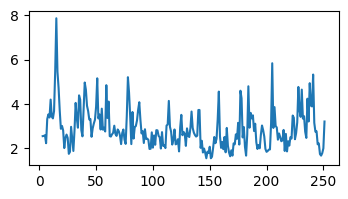

In [ ]:
plt.figure(figsize=(4, 2))
train_data['VolStock1(t)'].plot()

##PACF

<Figure size 400x200 with 0 Axes>

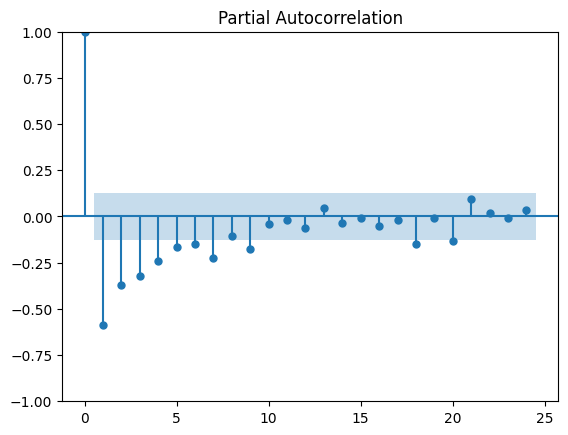

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Create a new figure
fig = plt.figure(figsize=(4, 2))

# Suppress automatic plot display within plot_pacf
plt.ioff()

# Generate only the PACF plot
plot_pacf(train_data['VolStock1(t)'].diff().diff().dropna())

# Show the figure with only the PACF plot
plt.ion()  # Re-enable interactive plotting
plt.show()

Here we can see that the first lag is significantly out of the limit and the second one is also out of the significant limit but it is not that far so we can select the order of the p as 2 or 3

## ACF

<Figure size 400x200 with 0 Axes>

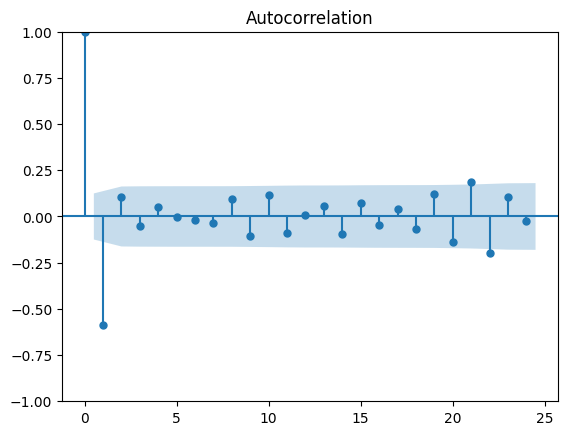

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 2))
plot_acf(train_data['VolStock1(t)'].diff().diff().dropna())
plt.show()

Here we can see that 3 of the lags are out of the significance limit so we can say that the optimal value of our q (MA) is 3.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit ARIMA model with optimal (p, d, q) values
optimal_pdq = (2, 0, 3)  # Replace with your optimal values
model = ARIMA(train_data['VolStock1(t)'], order=optimal_pdq)
arima_fitted_model = model.fit()

# Forecast on validation data
forecast = arima_fitted_model.forecast(steps=len(validate_data))

# Calculate MSE
mse = mean_squared_error(validate_data['VolStock1(t)'], forecast)
print("Mean Squared Error (MSE) on validation data:", mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error (MSE) on validation data: 2.0199154280926197


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


The code utilizes the statsmodels.tsa.arima.model.ARIMA class to fit an ARIMA model to the training data (train_data['VolStock1(t)']).
The optimal_pdq variable (currently replaced with a placeholder) should hold the optimal values for the model parameters:
p: Number of autoregressive terms (past values used for prediction)
d: Degree of differencing needed to achieve stationarity (removing trends)
q: Number of moving average terms for past errors

The Mean Squared Error (MSE) is calculated between the actual values in the validation data (validate_data['VolStock1(t)']) and the generated forecasts.
The provided output "Mean Squared Error (MSE) on validation data: 2.0199" indicates the average squared difference between the predicted and actual volume values on the validation set.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Fit SARIMAX model with optimal (p, d, q) and seasonal (P, D, Q, s) values and exogenous variables
optimal_pdq = (2, 0, 3)  # Replace with your optimal non-seasonal values
optimal_seasonal_pdq = (0, 0, 0, 5)  # Replace with your optimal seasonal values
exog_vars = ['EADay', 'EADayAfter', 'EADayBefore',
             'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday', 'DayOfWeek_Friday',
             'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8' ,'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Month_13', 'Month_14',
             'EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_6']
model = SARIMAX(train_data['VolStock1(t)'], exog=train_data[exog_vars], order=optimal_pdq, seasonal_order=optimal_seasonal_pdq)
fitted_model = model.fit()

# Forecast on validation data with exogenous variables
forecast = fitted_model.forecast(steps=len(validate_data), exog=validate_data[exog_vars])

# Calculate MSE
mse = mean_squared_error(validate_data['VolStock1(t)'], forecast)
print(f'Mean Squared Error: {mse:.2f}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error: 1.13


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


The ARIMA model, while effective for time series analysis, has limitations in capturing the complexities of real-world data, especially when considering multiple influencing factors. To address this, we employ the ARIMAX model, which extends the ARIMA framework to incorporate exogenous variables.

In this ARIMAX model, we leverage the inclusion of various relevant variables to enhance prediction accuracy. By considering all available columns in our dataset, we capture a broader range of factors that could impact the target variable.

Furthermore, to account for the weekly seasonality present in the data, we set the seasonal period (m) to 5, corresponding to the five trading days in a week. This allows the model to better capture recurring patterns and fluctuations over the course of a week.

The evaluation of the model's performance is crucial in assessing its effectiveness. With a mean squared error (MSE) of 1.13, our ARIMAX model demonstrates significantly improved predictive accuracy compared to the ARIMA model. This lower MSE indicates that our model's predictions are closer to the actual values, suggesting better overall performance.

By leveraging the ARIMAX framework and considering a comprehensive set of variables, we have achieved enhanced predictive capabilities, as evidenced by the notable improvement in MSE. This underscores the effectiveness of the ARIMAX model in capturing the complexities of our dataset and providing more accurate forecasts."

This revised explanation provides a clearer and more detailed overview of the ARIMAX model, its advantages over ARIMA, the rationale for including exogenous variables, and the significance of the obtained MSE value.

## Write prediction results to CSV file for final out-of-sample "test sample" to CSV file

In [ ]:
test_data

,ObsNum,TrainTest,VolStock1(t),EADay,EADayBefore,EADayAfter,VolStock1(t-1),VolStock2(t-1),VolStock3(t-1),VolStock4(t-1),...,SMA_2,SMA_3,SMA_4,SMA_5,SMA_6,EMA_2,EMA_3,EMA_4,EMA_5,EMA_6
503,504,Test,NaN,0,0,0,2.86,3.57,5.89,6.53,...,NaN,NaN,NaN,NaN,NaN,3.570000,5.890000,6.530000,4.930000,2.910000
504,505,Test,NaN,0,0,0,NaN,4.42,8.15,5.98,...,NaN,NaN,NaN,NaN,NaN,3.910000,6.794000,6.310000,4.526000,2.790000
505,506,Test,NaN,0,0,0,NaN,3.45,7.26,4.67,...,NaN,NaN,NaN,NaN,NaN,3.726000,6.980400,5.654000,4.143600,2.706000
506,507,Test,NaN,0,0,0,NaN,5.27,7.80,5.07,...,4.1775,7.2750,5.5625,4.0700,2.8150,4.343600,7.308240,5.420400,4.030160,2.887600
507,508,Test,NaN,0,0,0,NaN,3.67,5.91,4.90,...,4.2025,7.2800,5.1550,3.6150,2.7050,4.074160,6.748944,5.212240,3.662096,2.720560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,749,Test,NaN,0,0,0,NaN,3.35,2.34,2.14,...,4.0550,3.0075,2.7775,1.9250,1.5025,3.953212,3.067033,2.748381,2.045426,1.532384
749,750,Test,NaN,0,0,0,NaN,2.12,1.76,1.80,...,3.7800,2.6125,2.4225,1.7975,1.3325,3.219927,2.544220,2.369029,1.731256,1.299430
750,751,Test,NaN,0,0,0,NaN,2.47,2.22,2.40,...,2.8525,2.1800,2.2800,1.7500,1.1550,2.919956,2.414532,2.381417,1.874753,1.255658
751,752,Test,NaN,0,0,0,NaN,2.04,1.49,2.15,...,2.4950,1.9525,2.1225,1.6125,1.0675,2.567974,2.044719,2.288850,1.716852,1.161395


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Fit SARIMAX model with optimal (p, d, q) and seasonal (P, D, Q, s) values and exogenous variables
optimal_pdq = (2, 0, 3)  # Replace with your optimal non-seasonal values
optimal_seasonal_pdq = (0, 0, 0, 5)  # Replace with your optimal seasonal values
exog_vars = ['EADay', 'EADayAfter', 'EADayBefore',
             'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday', 'DayOfWeek_Friday',
             'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8' ,'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Month_13', 'Month_14',
             'EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_6']
model = SARIMAX(train_data['VolStock1(t)'], exog=train_data[exog_vars], order=optimal_pdq, seasonal_order=optimal_seasonal_pdq)
fitted_model = model.fit()

# Forecast on test data with exogenous variables
forecast_model = fitted_model.forecast(steps=len(test_data), exog=test_data[exog_vars])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

In [ ]:
# Save predictions to CSV file

# IMPORTANT: Your predictions should be labelled with the index
# of observation 503-752
#
# You should name your file "Assignment2 - YOUR NAME.csv"
forecast.to_csv('Assignment2 - Jasmine Gohil.csv')